In [6]:
import pandas as pd 
import numpy as np
import seaborn as sn
from datetime import datetime 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("sendy_logistics.csv")
df

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21196,Order_No_8834,User_Id_2001,Bike,3,Personal,20,3,3:54:38 PM,20,3,...,4:20:17 PM,3,28.6,NaN,-1.258414,36.804800,-1.275285,36.802702,Rider_Id_953,9
21197,Order_No_22892,User_Id_1796,Bike,3,Business,13,6,10:13:34 AM,13,6,...,10:46:17 AM,7,26.0,NaN,-1.307143,36.825009,-1.331619,36.847976,Rider_Id_155,770
21198,Order_No_2831,User_Id_2956,Bike,3,Business,7,4,5:06:16 PM,7,4,...,6:40:05 PM,20,29.2,NaN,-1.286018,36.897534,-1.258414,36.804800,Rider_Id_697,2953
21199,Order_No_6174,User_Id_2524,Bike,1,Personal,4,3,9:31:39 AM,4,3,...,10:08:15 AM,13,15.0,NaN,-1.250030,36.874167,-1.279210,36.794872,Rider_Id_347,1380


In [5]:
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [7]:
df["Temp_Diff"] = df["Temperature"].apply(lambda x : x-24)

In [8]:
df[["Temp_Diff","Temperature"]].head()

,Temp_Diff,Temperature
0,-3.6,20.4
1,2.4,26.4
2,NaN,NaN
3,-4.8,19.2
4,-8.6,15.4


In [9]:
df["Fehr_Temp"] = df["Temperature"].apply(lambda x : (x*9/5) + 32)

In [10]:
df[["Fehr_Temp","Temperature"]].head()

,Fehr_Temp,Temperature
0,68.72,20.4
1,79.52,26.4
2,NaN,NaN
3,66.56,19.2
4,59.72,15.4


In [11]:
df2 = pd.read_csv("ufo.csv")
df2

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


In [12]:
df2.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [13]:
df2["Time"] = pd.to_datetime(df2["Time"],format="%m/%d/%Y %H:%M")

In [16]:
def month_checker(row):
    if row["Time"].month == 12 :
        return 1
    else:
        return 0

In [17]:
df2["IN_December"] = df2.apply(month_checker,axis=1)
df2.head(5)

,City,Colors Reported,Shape Reported,State,Time,IN_December
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,0
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,0
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,0
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,0
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,0


In [18]:
df2["Time_Diff_From_WW1"] = abs(datetime(1914,7,28) - df2["Time"]) / np.timedelta64(1,"Y")

In [19]:
df2.head()

,City,Colors Reported,Shape Reported,State,Time,IN_December,Time_Diff_From_WW1
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,0,15.846778
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,0,15.925949
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,0,16.554983
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,0,16.845087
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,0,18.726714


In [20]:
df3 = pd.read_csv("titanic_full.csv")
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
def extract_title(name):
    if 'Mr.' in name:
        return 'Mr'
    elif 'Miss.' in name:
        return 'Miss'
    elif 'Mrs.' in name:
        return 'Mrs'
    else:
        return 'Untitled'

df3['Title'] = df3['Name'].apply(extract_title)
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Untitled
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


<AxesSubplot:xlabel='count', ylabel='Title'>

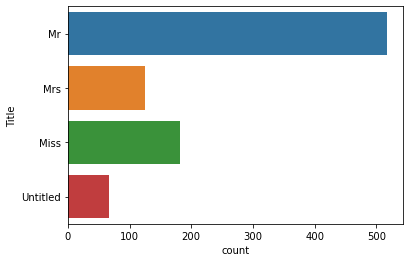

In [23]:
sn.countplot(data = df3 , y = "Title")

In [24]:
df4 = pd.read_csv("sendy_logistics.csv")
df4.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [25]:
df4["user id"] = df["User Id"].apply(lambda x : x.split("_")[2])
df4.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,user id
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,633
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,2285
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,265
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,1402
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,1737


In [26]:
df5 = pd.read_csv("visitor-interests.csv")
df5 = df5.head()
df5.head()

,IP,UserAgent,Country,Languages,Interests
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company


In [28]:
def extractor(data):
    ua = user_agents.parse(data)
    return pd.Series((ua.browser.family,ua.os.family,ua.device.family))

In [29]:
df5[['Browser', 'OS', 'Device']] = df5["UserAgent"].apply(extractor)
df5.head()

,IP,UserAgent,Country,Languages,Interests,Browser,OS,Device
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other,Chrome,Windows,Other
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage,Chrome,Windows,Other
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website,Chrome,Windows,Other
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company,Chrome,Android,Nexus 9
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company,Mobile Safari,iOS,iPad


In [30]:
df5 = pd.read_csv("visitor-interests.csv")
df5 = df5.head(50)
df5.head()

,IP,UserAgent,Country,Languages,Interests
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company


In [31]:
df5.shape

(50, 5)

In [32]:
!pip install --upgrade requests urllib3
import urllib.request
!pip install ip2geotools
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo

  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.6
    Uninstalling urllib3-1.26.6:
      Successfully uninstalled urllib3-1.26.6
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.


  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-py3-none-any.whl size=17463 sha256=7af2d19b1ca402eecd9fb90f146c3785c2502034f919d20fb8a09fbfef7f247f
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\18\44\5a\c7b93703f611ae3b50820efbaf265413e6b183a56cbec6f661
  Created wheel for maxminddb: filename=maxminddb-2.2.0-py2.py3-none-any.whl size=16357 sha256=1150011bd157f0474f9c4b28f9813714a3bcdf6691519c0f1a0258204b46f633
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\3b\eb\d9\b4407ec5d0ccddce61c8d2f4db72a68a77a04adea2245b98ef
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26324 sha256=c166827e160d02d202e2effb9b3a498a75aee668c7da96ff482f13769ffe38a9
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\35\f3\15\01aa6571f0a72ee6ae7b827c1491c37a1f72d686fd22b43b0e
Successfully built dicttoxml maxminddb typing
  Attempting uninstall: pkginfo
    Found existing installation: pkginfo 1.7.1
    Uninstalling 

In [33]:
def IP_details(IP):
    try:
        response = ip2geo.get(IP, api_key='free')
        return pd.Series((response.latitude , response.longitude))
    except:
        return np.nan

In [34]:
df5[["latitude","longitude"]] = df5["IP"].apply(IP_details)
df5.head(5)

,IP,UserAgent,Country,Languages,Interests,latitude,longitude
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other,NaN,NaN
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage,NaN,NaN
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website,35.643227,139.740055
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company,-34.928181,138.599931
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company,-33.822567,151.192340


In [38]:
df = pd.read_csv('Restaurant_Reviews.csv', sep='\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [39]:
reviews = df['Review']

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
vectorizer = CountVectorizer(stop_words='english')
reviews_vecctor = vectorizer.fit_transform(reviews)
reviews_vecctor.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
pd.DataFrame(reviews_vecctor.toarray(), columns=vectorizer.get_feature_names())

,00,10,100,11,12,15,17,1979,20,2007,...,year,years,yellow,yellowtail,yelpers,yucky,yukon,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df = pd.read_csv('Restaurant_Reviews.csv', sep='\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [44]:
reviews = df['Review']

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
vectorizer = TfidfVectorizer(stop_words='english')
reviews_vecctor = vectorizer.fit_transform(reviews)
reviews_vecctor.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
pd.DataFrame(reviews_vecctor.toarray(), columns=vectorizer.get_feature_names())

,00,10,100,11,12,15,17,1979,20,2007,...,year,years,yellow,yellowtail,yelpers,yucky,yukon,yum,yummy,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
